In [1]:
%matplotlib inline

In [2]:
import numpy as np
from random import random
from random import uniform
from math import sin
from math import pi
from scipy.stats import norm
from matplotlib import pyplot as plt

# MONTE CARLO Simulation 




 ## 1. Introduction 

Monte Carlo Simulation (MCS) is based on repeated random sampling. The underlying concept of Monte Carlo is to use randomness to solve problems that might be deterministic in principle. Monte Carlo simulation is one of the most popular techniques to draw inferences about a population without knowing the true underlying population distribution. MCS was initially invented to solve Buffon’s needle problem, in which $\pi$, could be estimated by dropping needles on a floor made of parallel equidistant strips. 

## 2. European Roulette

![Alt text](https://upload.wikimedia.org/wikipedia/commons/b/b9/European_roulette.svg)The American Roulette wheel has an extra 00

In European Roulette, the numbers on the wheel are in a different order, and there is no 00 segment, only a single green zero.It's a small distinction, but  that can make a significant difference to your win rate in the long term.

In [3]:
# generate n tries on European roulette 
def european_roulette_simulation(tries, slots=37):


    european_roulette_numbers = np.random.randint(0,slots,tries)
    counts, bins, patches = plt.hist(european_roulette_numbers, slots)
    mean = np.full(slots+1, tries/slots)
    plt.plot(bins, mean, 'r--', linewidth=2, label = "mean" )
    plt.xlabel("Numbers")
    plt.ylabel("How many times number occurs")
    plt.legend()
    plt.show()

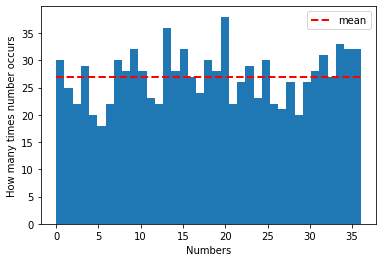

In [4]:
european_roulette_simulation(1000)

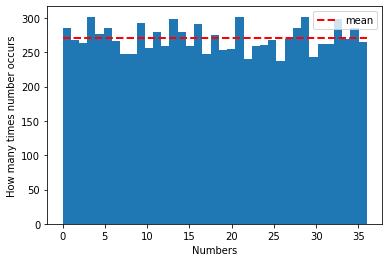

In [5]:
european_roulette_simulation(10000)

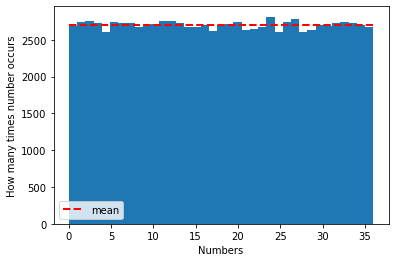

In [6]:
european_roulette_simulation(100000)

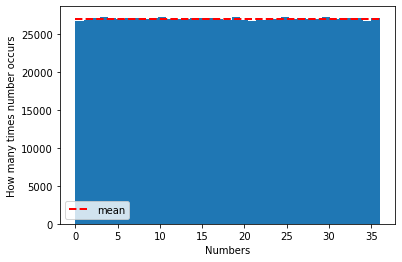

In [7]:
european_roulette_simulation(1000000)

Monte Carlo uses the Law of Large Numbers (LLN) Such famous law states that, as we increase the number of repetitions of a given experiment, the mean value of the results tend to get closer to the real value of the probability of those events to happen.

## 2. Approximate integrals with MCS

The idea behind Monte Carlo is that, as we use more samples, our answers should get more and more accurate.
With Monte Carlo method we can calculate the integral of sin(x) from 0 to $\pi$. The expected value of the integral is 2 $$\int_0^\pi sin(x)\text d x = 2$$

![mc_sin.jpeg](mc_sin.jpeg)

In [8]:
# Number of random points to be generated
N = 100000

count = 0
for i in range(N):
    point = (uniform(0,pi), random())
    if point[1] < sin(point[0]):
        count += 1
        
answer = (float(count)/float(N))*pi
err_mc = 2 - answer
print(answer)
print(err_mc)

2.00562416597826
-0.005624165978260098


## 3.Trapezoid Rule

Shouldn't it be possible to find the area by numerically integrating? At higher dimensions, though, direct numerical integration becomes more dificult. The number of function calculations for numeric integration grows exponentially with dimension. Monte Carlo integrations also increase in dificulty with dimension, but the increase is linear. Now we will use the Trapezoid Rule to approximate $$\int_0^\pi sin(x)\text d x $$ with 100 evenly spaced grid points over the whole interval. Compare this value to the exact value of 2. 
$$\sum_{i=0}^{n-1}h\frac{f(x_i)+f(x_{i+1})}{2} = \frac{h}{2}[(f(x_0) + f(x_1))+ (f(x_1) + f(x_2)) + (f(x_2) + f(x_3)) + ... + (f(x_{n-1}) + f(x_{n}))].$$
 $$ = \frac{h}{2}\Big((f(x_0) + 2\Big(\sum_{i=1}^{n-1}f(x_i)\Big) + f(x_n)\Big)$$


In [9]:
start_interval = 0
end_interval = np.pi
n = 100
h = (end_interval - start_interval) / (n - 1)
x = np.linspace(start_interval, end_interval, n)
f = np.sin(x)

trap = (h/2)*(f[0] + 2 * sum(f[1:n-1]) + f[n-1])
err_trap = 2 - trap

print(trap)
print(err_trap)

1.9998321638939924
0.00016783610600756838


## 4. Probability of being late for work

 То get to work I walk to take the subway and then walk to the office average duration  6 min. walk to the subway, 28 min. subway and 5 minutes walk to the building with normal distribution and standard deviation ( walk 1 minute and 2 minutes for subway, because I change lines ) - mean 39 min. I want to know what is the probability of being late for work. I'm late if I travel to work more than 42 minutes.
 
 I'll try to solve the problem use MCS and then will check result.

### 4.1 Generate random time values

I will generate time values (Normal Distribution) with this function.

In [10]:
def normal_distribution(mean, sigma, n): # n := samples or attempts
    results = norm.rvs(loc = mean, scale = sigma, size = n)
    return np.array(results)

### 4.2 Phases

I have 3 phases with mean duration (6, 28 and 5 minutes) and normal distribution. I know their standard deviation(1,2,1). I will use 100000 number of samples.

In [11]:
walk_time_to_subway = normal_distribution(6, 1, 100000)
subway_time = normal_distribution(28, 2, 100000)
walk_time_to_office = normal_distribution(5, 1, 100000)

### 4.3 Histogram of values

In [12]:
def histogram_values(phase):

    plt.hist(phase, bins = list(range(40)), facecolor = "green", alpha = 0.7)
    plt.xlabel('Time[min]')
    plt.ylabel('Number of samples') 
    plt.title('Normal distribution of the phase')
    plt.show()

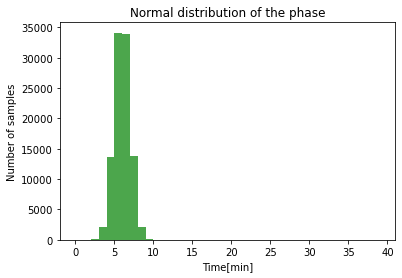

In [13]:
histogram_values(walk_time_to_subway)

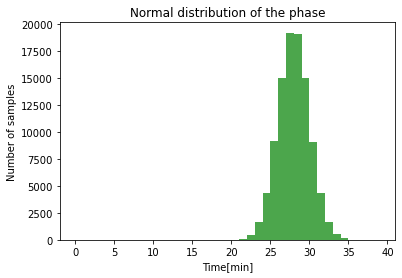

In [14]:
histogram_values(subway_time)

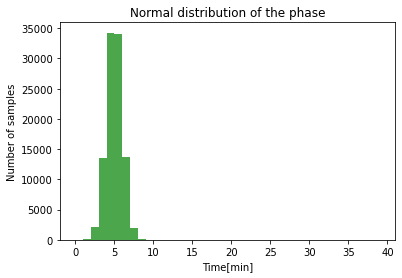

In [15]:
histogram_values(walk_time_to_office)

### 4.4 Test values

I can check mean, variance and standard deviation for all 3 phases.

In [16]:
def check_mean_variance_std(phase):# function returns Mean time, Variance, Standard deviation 
    return [
        phase.mean(),
        phase.var(ddof = 1),
        phase.std(ddof = 1)
    ]

In [17]:
check_mean_variance_std(walk_time_to_subway)

[5.9987640099252655, 1.0005707767033138, 1.000285347640019]

In [18]:
check_mean_variance_std(subway_time)

[27.996293935304553, 4.003285463974997, 2.000821197402456]

In [19]:
check_mean_variance_std(walk_time_to_office)

[4.998182784402115, 0.9984246648374849, 0.9992120219640499]

### 4.5 Probability  (late for work)

To calculate the probability of being late for work I will use this formula: 

$$\mathbb{P}(\text{late   for   work}) = \frac{\text{How   many   times   late   for   work}}{\text{Number of samples}}$$

In [20]:
late_for_work = 42

total_time = walk_time_to_subway + subway_time + walk_time_to_office

probability = np.sum(total_time > late_for_work) / len(total_time) * 100 
# OR (len([x for x in total_time if x > late_for_work]) / len(total_time)) * 100

print(f"Probability of being late for work is : {round(probability, 3)}%")

Probability of being late for work is : 10.989%


### 4.6 Plot histogram with Normal Distribution

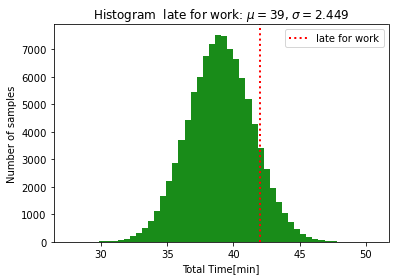

In [21]:
mu = 39 # mean of distribution
sigma = 2.449 # standard deviation of distribution 
x = mu + sigma * np.random.randn(100000)

num_bins = 50

# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, facecolor='green', alpha=0.9)

plt.axvline(x = 42, ymin = 0, color='red', linestyle='dotted', linewidth=2, label = 'late for work')

plt.xlabel('Total Time[min]')
plt.ylabel('Number of samples')
plt.title(r'Histogram  late for work: $\mu=39$, $\sigma=2.449$')
plt.legend()
plt.show()

### 4.7 Verify result

$$T= N(\mu, \sigma^2)$$
I have $$T_1 = N(6,1)\Longrightarrow T_2 = N(28,4)\Longrightarrow  T_3 = N(5,1)$$

$$X = T_1 + T_2 + T_3$$

$$X = \sum_{i= 1}^{3}\mu_i,\sum_{i= 1}^{3}\sigma_i^2$$
for my case $$X = N(39,6)$$

### 4.8 Z-score

If I want to calculate probability of being late for work, first I need to find z-score

$$Z = \frac{x - \mu}{\sigma} = \frac{42-39}{\sqrt6} \approx 1.22$$

In [22]:
z_score = (42 - 39) / np.sqrt(6)
print(z_score)

1.2247448713915892


### 4.9 P-value

From [z-score table](https://www.ztable.net/) for 1.22 I found P-value 0.88877
$$1 - p = 1 - 0.88877 = 0.111123 = 11.1\%$$

In [23]:
p_value = 1 - 0.88877
print(p_value)

0.11123000000000005


I can also find the probability of being late for work using scipy.stats.norm with cumulative density function

In [24]:
1 - norm.cdf(1.22)

0.11123243744783462

## 5. Disadvanteges and advanteges of MCS

### 5.1 Disadvanteges

Distribution assumptions – Monte Carlo simulations are built around a specific type of statistical distribution. Use the right distribution and your results are valid, use the wrong one and the results are meaningless.

Solutions are not exact, but depend on the number of repeated runs used to produce the output statistics. That is, all outputs are estimates.

Calculations can take much longer than analytical models. 

### 5.2 Advanteges

Very flexible. There is virtually no limit to the analysis. Empirical distributions can be handled.

Easily understood by non-mathematicians. 

Can generally be easily extended and developed as required.

## References
https://towardsdatascience.com/monte-carlo-simulation-and-variants-with-python-43e3e7c59e1f \
https://www.datacamp.com/tutorial/histograms-matplotlib \
https://matplotlib.org/3.1.0/gallery/statistics/histogram_features.html \
https://www.kaggle.com/code/xopxesalmon/intro-to-monte-carlo-methods-integral-of-sin-x/notebook \
https://en.wikipedia.org/wiki/Normal_distribution \
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html \
https://www.ztable.net/ 